In [85]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore") # Ignore warnings


# TensorFlow
import tensorflow as tf

In [86]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [87]:
directory = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

classes = [i for i in os.listdir(directory) if '.' not in i] #Classification based on folders
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

This code snippet is extracting the names of the fish classes from the dataset directory structure. Each subdirectory within 'Fish_Dataset' is assumed to represent a different class of fish. The code then stores these class names in the 'classes' list.

In [88]:
label = []   # A list to store labels is created
path = []    # A list to store file paths is created

# A loop is created for each file in the current directory.
for dir_name, _, filenames in os.walk(directory):            
    for filename in filenames:
        if dir_name.split()[-1] != 'GT':                    # If the directory does not contain 'GT'
            if os.path.splitext(filename)[-1] == '.png':    # If the filename ends with .png
                label.append(os.path.split(dir_name)[-1])   # Append the directory name to the label list
                path.append(os.path.join(dir_name, filename)) # Append the full path of the .png file to the path list

# Create a DataFrame with 'path' and 'label' columns
data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path  # Assign the file paths to the 'path' column
data['label'] = label  # Assign the labels to the 'label' column

label = [] and path = []: These lines create two empty lists to store labels and file paths, respectively.

for dir_name, _, filenames in os.walk(directory): This line uses the os.walk function to traverse through all subdirectories and files within the specified directory. In each iteration, dir_name contains the current directory's name, _ is an unused variable (a list of subdirectories), and filenames contains the list of files in the current directory.

for filename in filenames: This line creates a loop to iterate through each file in the current directory.

if dir_name.split()[-1] != 'GT': This line checks if the last part of the current directory name is not 'GT'. 'GT' usually stands for "Ground Truth" and represents directories that may contain label files. These directories are skipped because they are not used for model training.

if os.path.splitext(filename)[-1] == '.png': This line checks if the file extension is '.png'. Only PNG format images are processed.

label.append(os.path.split(dir_name)[-1]): This line appends the last part of the current directory's name (the label of the fish species) to the label list.

path.append(os.path.join(dir_name, filename)): This line appends the full file path of the current file to the path list.

data = pd.DataFrame(columns=['path', 'label']): This line creates an empty Pandas DataFrame with columns 'path' and 'label'.

data['path'] = path and data['label'] = label: These lines fill the DataFrame's 'path' and 'label' columns with the previously created lists.

In [89]:
# Data visualization
data

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
...,...,...
8995,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8996,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8997,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8998,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


There are a total of 9000 rows and 2 columns, namely path and label. The path column contains the file path of the respective image. The label column indicates which class the image belongs to.

In [90]:
# First observation
data.path[0]

'/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00929.png'

In [91]:
# Observations for each fish species
data.label.value_counts()

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

In [92]:
# Display information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


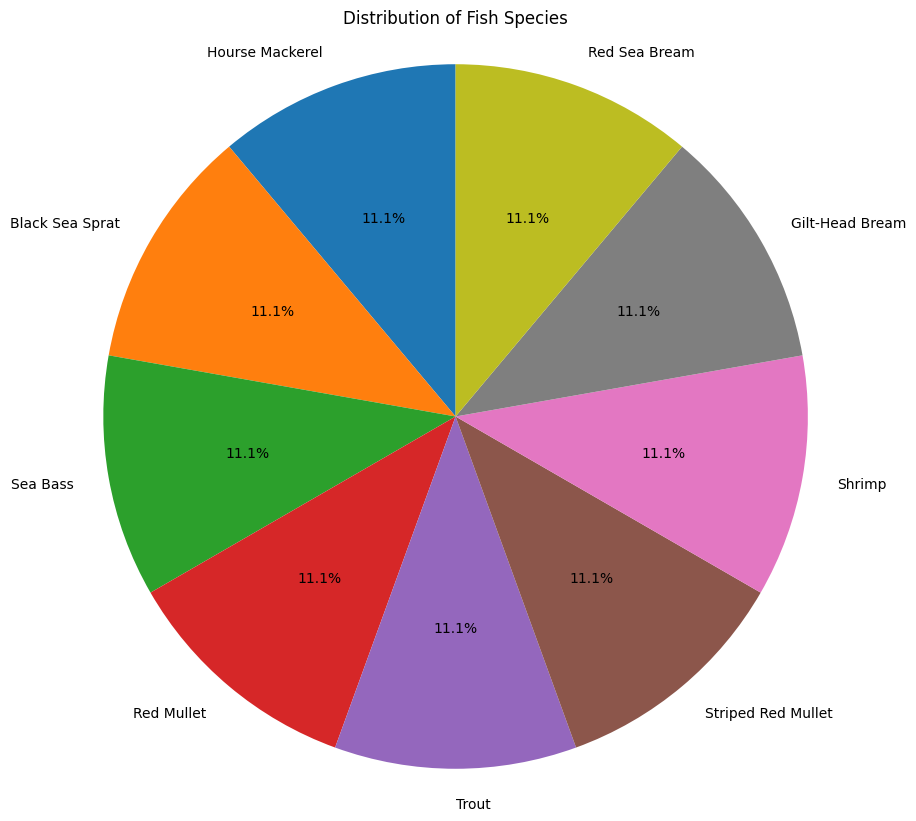

In [93]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Generates the pie chart
class_counts = data['label'].value_counts()  # Calculate the count of each class
plt.figure(figsize=(10, 10))  # Set the figure size to 10x10 inches
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fish Species')  # Set the title of the pie chart
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()  # Display the pie chart

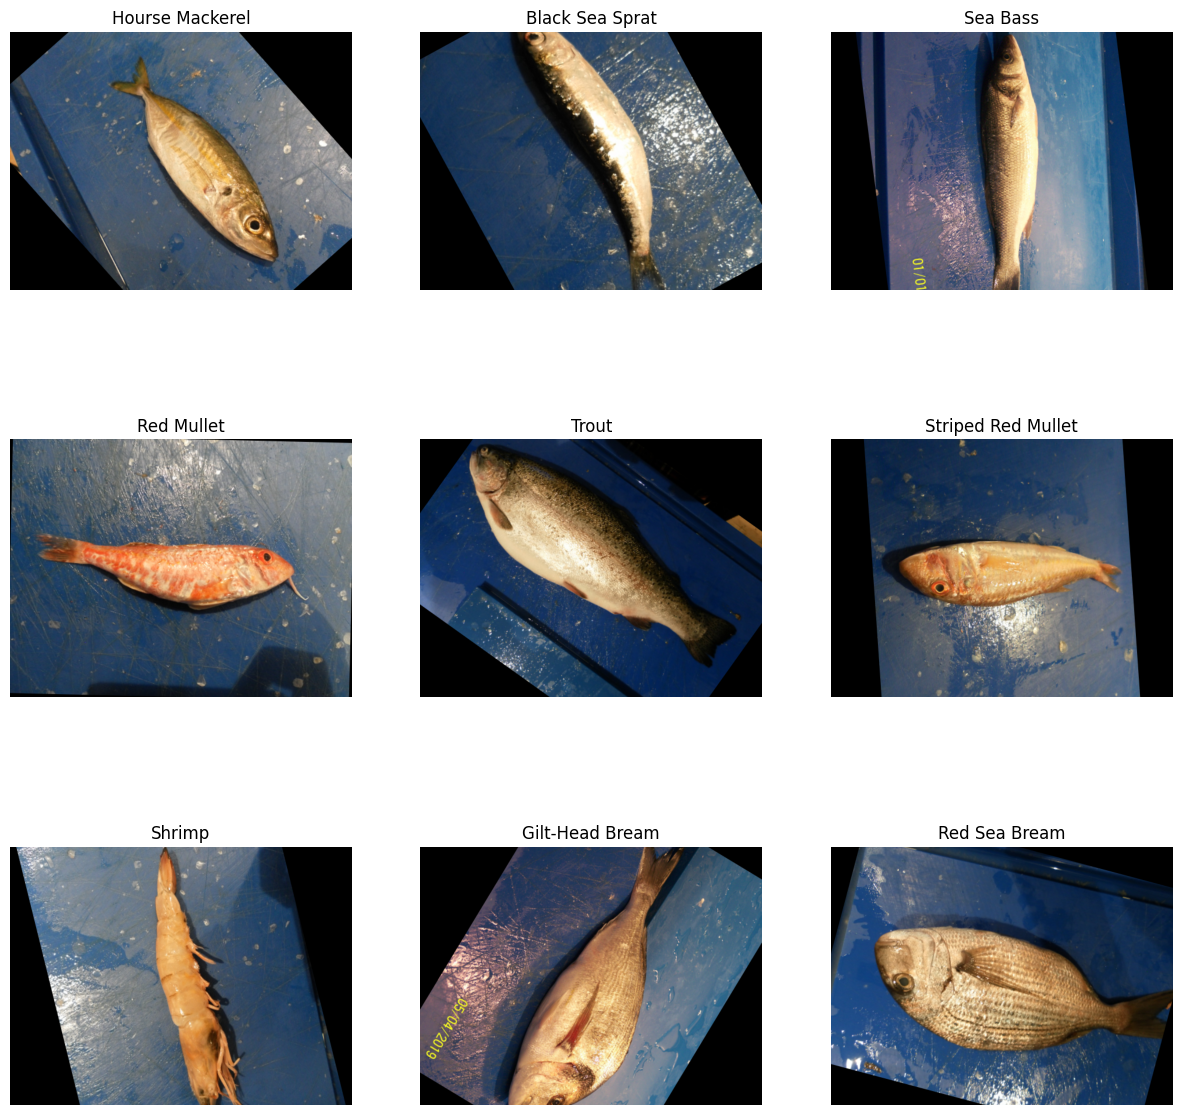

In [94]:
cn = 0
plt.figure(figsize=(15, 15))  # Set the figure size to 15x15 inches
for unique_label in data['label'].unique():  # Loop through each unique fish species (label)
    plt.subplot(3, 3, cn + 1)  # Create a 3x3 grid of subplots and place the current plot in the next position
    plt.imshow(plt.imread(data[data['label'] == unique_label].iloc[0, 0]))  # Display the first image for each unique label
    plt.title(unique_label)  # Set the title of the subplot to the species name
    plt.axis('off')  # Turn off the axis for the subplot
    cn += 1  # Increment the counter to move to the next subplot

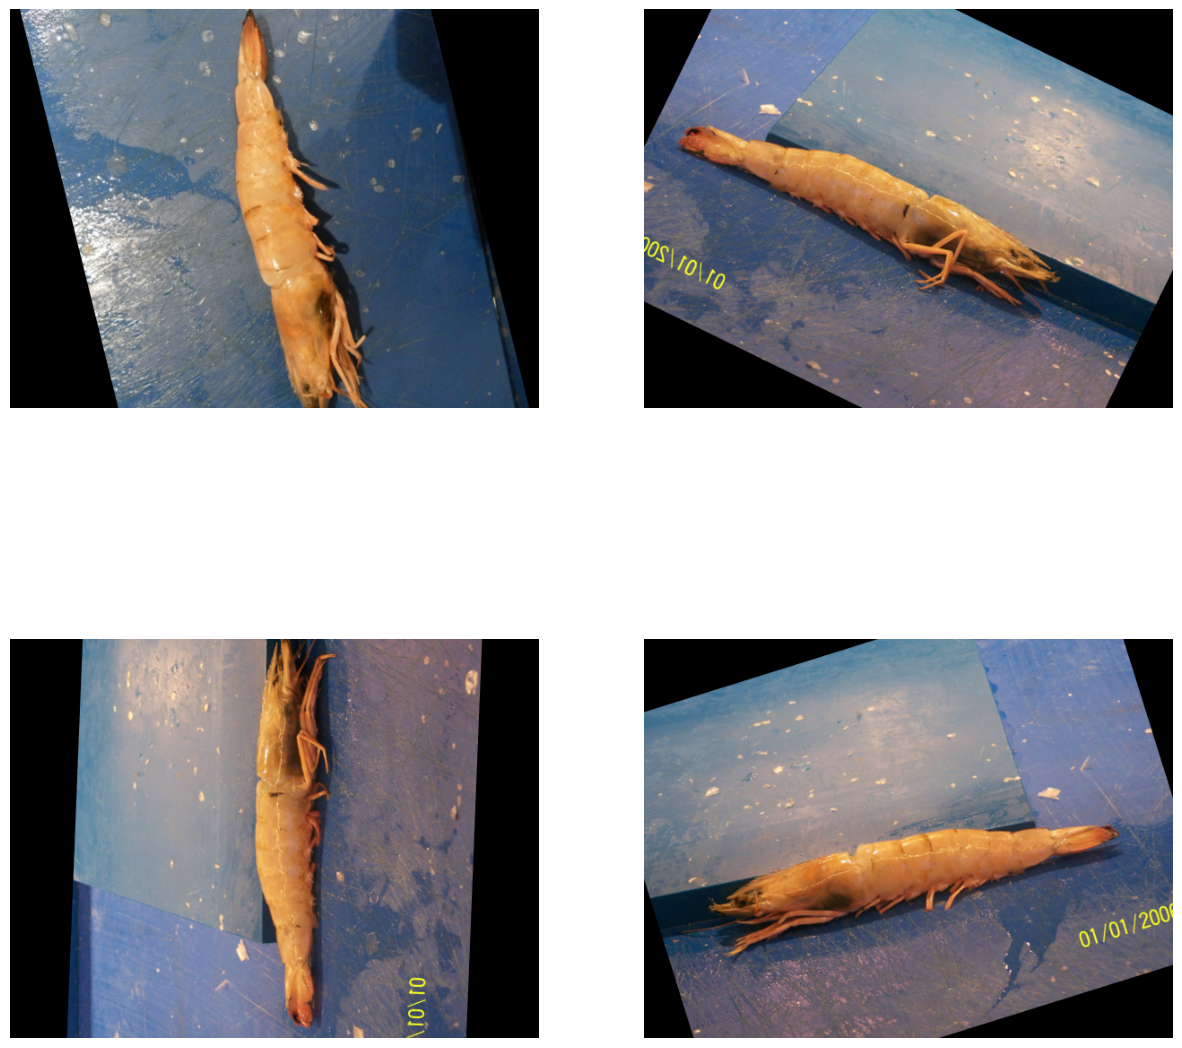

In [69]:
# Display only shrimp
shrimps = data[data['label'] == 'Shrimp'].path.iloc[0:4]  # Filter data for 'Shrimp' label and select the first 4 images

cn = 0
plt.figure(figsize=(15, 15))  # Set the figure size to 15x15 inches
for shrimp in shrimps:
    plt.subplot(int(np.sqrt(len(shrimps))), int(np.sqrt(len(shrimps))), cn + 1)  # Create subplots based on the number of shrimp images
    plt.imshow(plt.imread(shrimp))  # Display each shrimp image
    plt.title(shrimp[-9:4])  # Set the title using part of the file path (adjust as needed)
    plt.axis('off')  # Turn off the axis
    cn += 1  # Increment the counter for the next subplot

In [95]:
# Split the data into Training and Test sets

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

This line of code splits the dataset into training and testing sets, ensuring a reproducible split and maintaining the class distribution in both subsets. This is essential for training and evaluating a classification model effectively.

train_data, test_data = ...: This part assigns the output of the train_test_split function to two variables: train_data and test_data. These will hold the training and testing subsets of the data, respectively.

train_test_split(data, ...): This is the function call to perform the split. The first argument, data, is the original dataset that you want to divide.

test_size=0.2: This argument specifies that 20% of the data should be allocated to the testing set. The remaining 80% will be used for training.

random_state=42: This ensures that the split is reproducible. By setting a specific random seed (42 in this case), you will get the same split every time you run the code. This is helpful for consistency in experiments.

stratify=data['label']: This is crucial for classification tasks. It ensures that the proportion of samples in each class is maintained in both the training and testing sets. This is important for preventing imbalances that could bias the model's learning. By specifying stratify=data['label'], the split will be done in a way that preserves the original distribution of labels in both subsets.

In [96]:
#Checking the shape of train and test set

print(train_data.shape)
print(test_data.shape)

(7200, 2)
(1800, 2)


This line prints the shape of the train_data DataFrame or array. The shape attribute returns a tuple representing the dimensions of the data structure. For example, if train_data is a DataFrame with 7200 rows and 2 columns, the output would be (7200, 2)

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Creating daha generators for training and testing
train_generator = ImageDataGenerator(
    rescale=1./255,        # Rescales pixel values to the range  [0,1] (normalization)
    validation_split=0.2   # Specifies 20% of the training data for validation
)

test_generator = ImageDataGenerator(rescale=1./255)  #Only rescales pixel values for the test set (normalization)

ImageDataGenerator class in TensorFlow and Keras:
It is used for data augmentation and preprocessing of image data. This method enhances the diversity of the training data for a deep learning model by transforming the images in various ways (such as rotating, zooming, horizontal/vertical flipping). This helps improve the variety of training data.

Purpose:

Data augmentation: To artificially increase the variety of the training set by applying transformations like rotation, shifting, and scaling to the images.
Data normalization: To scale the images to a specific range, i.e., normalizing the pixel values to the range of 0 to 1.
Real-time data loading: To load the data in small batches from the disk, without having to store large amounts of images in memory.
rescale=1./255:
This parameter is used to scale the pixel values from the range 0-255 to 0-1. Each pixel value is divided by 255 to normalize it. Deep learning models typically work better with data that has been normalized this way.

validation_split=0.2:
It sets aside 20% of the training data as a validation set. This is used to monitor the model's performance on validation data during training.

train_generator:
It is used for working with training data. It normalizes the data and sets aside 20% of it for validation.

test_generator:
It is used for the test data and only applies normalization (rescaling). No other data augmentation operations are applied.

In [98]:
#Loading the training data
train_images = train_generator.flow_from_dataframe(
    dataframe=train_data,    #train_data DataFrame should be used
    directory=None,
    x_col='path',
    y_col='label',
    target_size=(64, 64),    #Suitable size for ANN
    batch_size=32,
    class_mode='categorical',  #'categorical' for multi-class, 'binary' for binary class
    subset='training',
    shuffle=True,
    seed=42
)

#Loading the validation data
valid_images = train_generator.flow_from_dataframe(
    dataframe=train_data,   #train_data Dataframe should be used
    directory=None,
    x_col='path',
    y_col='label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False)  #Validation data should not be shuffled

#Loading the test data
test_images = test_generator.flow_from_dataframe(
    dataframe=test_data,  #test_data DataFrame should be used
    directory=None,
    x_col='path',
    y_col='label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


dataframe=train_data: The train_data DataFrame is used to load the data.
directory=None: No directory is specified since the full image paths are already in the path column.
x_col='path': The column containing the image file paths.
y_col='label': The column containing the labels for the images.
target_size=(64, 64): Images are resized to 64x64 pixels, which is suitable for artificial neural networks (ANN).
batch_size=32: Data will be processed in batches of 32 images.
class_mode='categorical': Used for multi-class classification.
subset='training': Specifies that this subset is for training, not validation.
shuffle=True: The data will be shuffled for each epoch.
seed=42: The random seed is set to ensure reproducibility of the data shuffling.

subset='validation': Specifies that this subset is for validation (20% of the training data).
shuffle=False: The validation data is not shuffled to keep the data in a consistent order for validation.

dataframe=test_data: The test_data DataFrame is used to load the test data.
shuffle=False: The test data is not shuffled to keep the order consistent, ensuring accurate performance evaluation of the model.

In [99]:
#Get a batch of images and labels
images, labels = next(train_images)

#Check if the first 5 labels are one-hot encoded
print("İlk 5 etiket (One-Hot Encoded):")
print(labels[:5])

İlk 5 etiket (One-Hot Encoded):
[[0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


images, labels = next(train_images):
This line fetches a batch of images and their corresponding labels from the train_images generator.
train_images is a data generator created using ImageDataGenerator. This generator not only feeds the images to your model but also provides the corresponding labels for those images.
The next() function is used to retrieve a batch from the generator. Each batch contains a number of images and their corresponding labels based on the batch_size you defined. For example, if batch_size=32, it returns 32 images and their corresponding 32 labels.

print(labels):
labels contain the class labels for the images fed into your model.
If you're using class_mode='categorical', these labels are One-Hot Encoded vectors. This means each class is represented by a vector. For example, if there are 9 classes, each label will be a vector of 9 elements.

less
Kodu kopyala
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]  # Class 0 (e.g., 'Shrimp')

 [0. 1. 0. 0. 0. 0. 0. 0. 0.]  # Class 1 (e.g., 'Salmon')
 
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]  # Class 2 (e.g., 'Tuna')
 ...
]


In [100]:
#Initialize the Sequntial model for ANN
model = tf.keras.models.Sequential()

#Add model Layers
#Input Layer -Flatten the input data using Flatten layer
model.add(tf.keras.layers.Flatten(input_shape=(64, 64, 3))) #Updated input shape

# Hidden Layers
model.add(tf.keras.layers.Dense(512, activation='relu')) #Updated input dimension
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer. Using softmax for multi-class classification
#Adjusting the number of neurons in the output layer based on the dataset
num_classes = len(train_images.class_indices) #Correct way to get count from DataFrameIterator
model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) #Updated output layer based on class count

Input Layer:

Flatten Layer: This layer flattens the input data. For example, an RGB image of size 64x64 (3 channels) is transformed into a single vector by combining the pixel values across the channels.
input_shape=(64, 64, 3): Specifies the input shape of the model, indicating that each image has a size of 64x64 pixels and 3 color channels (RGB). This is necessary for the model to understand the input dimensions.
This layer converts the two-dimensional image into a one-dimensional vector that the model can process.
Hidden Layers:

Dense Layer (512, 256, 128 neurons): These layers represent the "hidden" layers in the model. Each has a specified number of neurons:
The first hidden layer has 512 neurons.
The second hidden layer has 256 neurons.
The third hidden layer has 128 neurons.
activation='relu': The ReLU (Rectified Linear Unit) activation function is used to calculate the output of each neuron. ReLU sets negative values to zero and leaves positive values unchanged. This allows the model to learn non-linear relationships.
Output Layer:

num_classes: Specifies the number of classes obtained from train_images.class_indices, meaning it calculates how many different classes are in the dataset (for example, if there are 9 classes, num_classes=9).
Dense Layer (Output Layer): In this layer, the number of neurons is equal to the number of classes. Each neuron corresponds to one class.
activation='softmax': The softmax activation function is used for multi-class classification problems. It provides a probability distribution for each class, with the total sum being 1. The model uses these probabilities to decide which class an input belongs to.
Summary:

In the first layer, we flatten the input data to make it suitable for the model to learn.
In the hidden layers, the ReLU activation function helps the model learn complex relationships.
In the final layer, neurons are added according to the number of classes, and softmax is used to perform the classification.

In [103]:
#Compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In this step, the model:

Updates its weights using the Adam optimization algorithm,
Solves a multi-class classification problem using Categorical Crossentropy,
Tracks the model’s performance using accuracy as a performance metric.
model.compile(): This is the function used in Keras to compile a model.

optimizer='adam': Specifies the optimization algorithm used to update the model’s weights. 'Adam' is a widely used optimization algorithm that generally yields good results.
loss='categorical_crossentropy': Specifies the loss function used to measure the model’s performance. 'Categorical Crossentropy' is a suitable loss function for multi-class classification problems.
metrics=['accuracy']: Specifies the metrics used to evaluate the model’s performance. 'Accuracy' measures the proportion of correct predictions made by the model.

In [104]:
# Fit the model and store results in the 'results' variable
results = model.fit(train_images,epochs=10, batch_size=128, validation_data=valid_images)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 69s 363ms/step - accuracy: 0.2745 - loss: 2.3366 - val_accuracy: 0.5146 - val_loss: 1.4314
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 68s 365ms/step - accuracy: 0.5857 - loss: 1.2156 - val_accuracy: 0.6201 - val_loss: 1.0095
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 74s 403ms/step - accuracy: 0.7297 - loss: 0.7953 - val_accuracy: 0.7514 - val_loss: 0.6898
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 67s 364ms/step - accuracy: 0.8060 - loss: 0.5657 - val_accuracy: 0.7806 - val_loss: 0.6095
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 68s 365ms/step - accuracy: 0.8448 - loss: 0.4314 - val_accuracy: 0.8562 - val_loss: 0.3958
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 67s 361ms/step - accuracy: 0.8636 - loss: 0.3757 - val_accuracy: 0.8938 - val_loss: 0.3090
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 67s 361ms/step - accuracy: 0.8922 - loss: 0.2931 - val_accuracy: 0.8778 - val_loss: 0.4199
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 67s 361ms/step - accuracy: 0.9339 - loss: 0

The model is trained for 10 epochs with the training data. During training, the model’s performance is monitored using the validation dataset. The results are stored in the results variable for later analysis.

1. model.fit():
The model.fit() function is used to train the deep learning model on the training data. The model updates its weights based on the training data and works to minimize the loss function during this process.
2. train_images:
train_images represents the training dataset. This dataset contains the images and labels that the model uses to learn.
3. epochs=10:
epochs=10: Specifies how many times the model will iterate over the training data. In this case, the model will process the entire training dataset 10 times.
4. batch_size=128:
batch_size=128: The training data is divided into small groups (batches) that are fed to the model. At each step, the model is trained with 128 images, after which the weights are updated. The batch size determines how many samples are processed before updating the model's weights.
5. validation_data=valid_images:
validation_data=valid_images: Specifies the validation dataset. During training, the model evaluates its performance on the validation data to monitor the training process and check for overfitting. This dataset is not used for learning, only for evaluation purposes.
6. results:
results: Stores the outcomes and metrics from the model's training. This variable contains data such as loss and accuracy, recorded during both training and validation. These results can later be analyzed or visualized using graphs.

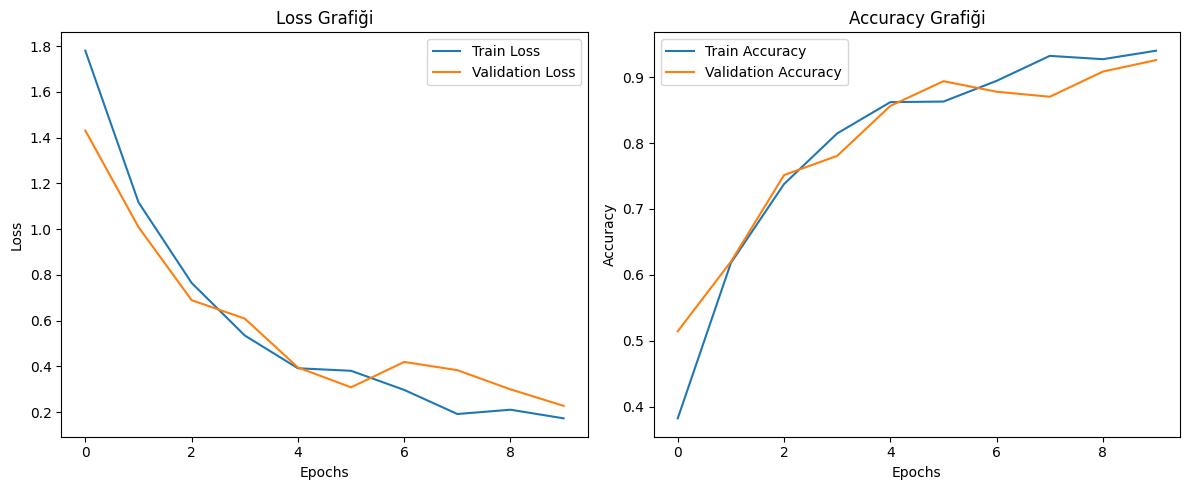

In [105]:
# Now let's compare the performance of the train and validation sets.

# Create the figure with a specified size (12x5 inches)
plt.figure(figsize=(12, 5))

# Plot the graphs for the loss value
plt.subplot(1, 2, 1)   # Select the first subplot (1 row, 2 columns, position 1)
plt.plot(results.history['loss'], label='Train Loss')  # Plot the training loss over the epochs
plt.plot(results.history['val_loss'], label='Validation Loss')  # Plot the validation loss over the epochs
plt.title('Loss Grafiği')  # Add a title to the plot
plt.xlabel('Epochs')  # Label the X-axis as 'Epochs'     
plt.ylabel('Loss') # Label the Y-axis as 'Loss'
plt.legend()  # Add a legend to distinguish between train and validation loss

# Plot the accuracy score graphs
plt.subplot(1, 2, 2)  # Select the second subplot (1 row, 2 columns, position 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')  # Plot the training accuracy over the epochs
plt.plot(results.history['val_accuracy'], label='Validation Accuracy') # Plot the validation accuracy over the epochs
plt.title('Accuracy Grafiği')  # Add a title to the accuracy plot
plt.xlabel('Epochs')     # Label the X-axis as 'Epochs'
plt.ylabel('Accuracy')    # Label the Y-axis as 'Accuracy'
plt.legend()   # Add a legend to distinguish between train and validation accuracy

plt.tight_layout() # Automatically adjust the layout to prevent overlap between subplots
plt.show() # Display the plot


The code generates graphs to compare the loss and accuracy metrics for the training and validation datasets.
The first graph shows the loss values for both the training and validation sets. The second graph displays the accuracy rates for both.
These graphs allow for the analysis of the model's performance and trends, helping to determine whether there is overfitting or if the model is generalizing well.

Detailed Code Explanation:
plt.figure(figsize=(12, 5)): Creates a figure for the graph and sets its size to 12x5 inches.
plt.subplot(1, 2, 1): Creates a layout with 1 row and 2 columns within the figure and selects the first subplot. This is where the loss graph will be plotted.
plt.plot(results.history['loss'], label='Train Loss'): Plots the loss values over the epochs for the training set and labels the line as "Train Loss."
plt.plot(results.history['val_loss'], label='Validation Loss'): Plots the loss values over the epochs for the validation set and labels the line as "Validation Loss."
plt.title('Loss Grafiği'): Adds the title "Loss Graph" to the subplot.
plt.xlabel('Epochs'): Adds the label "Epochs" to the x-axis.
plt.ylabel('Loss'): Adds the label "Loss" to the y-axis.
plt.legend(): Adds a legend to show the labels for the lines on the graph.
plt.subplot(1, 2, 2): Selects the second subplot in the 1 row, 2 column layout. This is where the accuracy graph will be plotted.
plt.plot(results.history['accuracy'], label='Train Accuracy'): Plots the accuracy values over the epochs for the training set and labels the line as "Train Accuracy."
plt.plot(results.history['val_accuracy'], label='Validation Accuracy'): Plots the accuracy values over the epochs for the validation set and labels the line as "Validation Accuracy."
plt.title('Accuracy Grafiği'): Adds the title "Accuracy Graph" to the subplot.
plt.xlabel('Epochs'): Adds the label "Epochs" to the x-axis.
plt.ylabel('Accuracy'): Adds the label "Accuracy" to the y-axis.
plt.legend(): Adds a legend to show the labels for the lines on the graph.
plt.tight_layout(): Adjusts the layout to prevent the subplots from overlapping.
plt.show(): Displays the generated graph.

In [106]:
# Now let's perform prediction with the test set and check the score
y_pred = model.predict(test_images) # Make predictions on the test set
y_pred_classes = np.argmax(y_pred, axis=1) # Get the highest probability class value using argmax

57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 311ms/step


This code block makes predictions on the test data using the trained model and obtains the predicted classes.

y_pred = model.predict(test_images): This line uses the trained model to make predictions on the test dataset (test_images). The model generates probability values for each class for every test image.
The model returns a probability value for each class for every test image. For example, if there are 3 classes, the model might output something like [0.1, 0.6, 0.3] for an image. This shows that the model thinks the image belongs to the second class with a 60% probability.

y_pred_classes = np.argmax(y_pred, axis=1): This function returns the index of the class with the highest value in each predicted probability array. In other words, it finds which class has the highest probability for each test image.

y_pred: This is the array that contains the predicted probability values for the test set.

axis=1: The argmax function finds the class with the highest probability in each row (i.e., for each test example). It selects the highest value among the probability values for each test sample.

In [108]:
# Analyzing model performance on test data
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_images.labels, y_pred_classes) # Calculate the accuracy by comparing true and predicted labels

print("Test Accuracy:", accuracy)   # Print the test accuracy

Test Accuracy: 0.9222222222222223


This code block calculates the accuracy score to measure the model’s performance on the test data. The accuracy score represents the ratio of correct predictions made by the model and is a value between 0 and 1. An accuracy score close to 1 indicates that the model performs well on the test data.

from sklearn.metrics import accuracy_score: Imports the accuracy_score function from the sklearn.metrics module. This function is used to calculate the accuracy score between the true labels and the predicted labels.

accuracy = accuracy_score(test_images.labels, y_pred_classes): Calculates the accuracy score using the accuracy_score function and assigns it to the accuracy variable.

test_images.labels: Contains the true labels of the test data.
y_pred_classes: Contains the predicted class labels from the model on the test data.
print("Test Accuracy:", accuracy): Prints the calculated accuracy score to the console.

In [111]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Encode the true labels (test_images.labels) and the predicted labels (y_pred_classes)
encoder = LabelEncoder()
test_labels = encoder.fit_transform(test_images.labels)  # Transform test set labels
prediction_labels = encoder.fit_transform(y_pred_classes)  # Transform predicted labels

# Generate the classification report
print(classification_report(test_labels, prediction_labels))
accuracy = accuracy_score(test_labels, prediction_labels)
print("Test Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.88      0.99      0.93       200
           1       1.00      0.90      0.94       200
           2       0.91      0.96      0.94       200
           3       0.88      0.97      0.93       200
           4       0.99      0.85      0.92       200
           5       0.91      0.82      0.86       200
           6       0.91      0.94      0.92       200
           7       0.89      0.94      0.91       200
           8       0.94      0.93      0.93       200

    accuracy                           0.92      1800
   macro avg       0.93      0.92      0.92      1800
weighted avg       0.93      0.92      0.92      1800

Test Accuracy: 0.9222222222222223


This code compares the model's predictions with the test dataset, converts the labels into numerical values, and generates a report to evaluate classification performance.

İmporting Libraries:
LabelEncoder: This class from sklearn is used to convert categorical labels (e.g., text labels) into numerical values. This helps the model process the labels more easily.
classification_report: A function that generates a report of classification metrics like precision, recall, and F1-score, which are used to evaluate the performance of a classification model.

Encoding the Labels:
encoder = LabelEncoder(): You create an instance of the LabelEncoder class to transform categorical labels into numerical values.
encoder.fit_transform(test_images.labels): Transforms the true labels from the test set into numerical values. fit_transform both fits the encoder (learning the label mappings) and transforms the labels into numbers.
For example, fish species labels like 'salmon,' 'tuna,' and 'bass' can be converted into numerical values as 0, 1, and 2, respectively.
So, 'salmon' can be labeled as 0, 'tuna' as 1, and 'bass' as 2. These numerical labels can then be processed more easily by the model.
encoder.fit_transform(y_pred_classes): Similarly, this line transforms the predicted labels (from your model) into numerical values.

Generating the Classification Report:
classification_report: This function compares the true labels (test_labels) with the predicted labels (prediction_labels) and generates a report with key performance metrics:
Precision: How many of the predicted positive cases were actually positive.
Recall: How many of the actual positive cases were correctly predicted.
F1 score: The harmonic mean of precision and recall.